In [20]:
# This example creates an approximate Ez-polarized planewave in vacuum
# propagating at a 45-degree angle, by using a couple of current sources
# with amplitude exp(ikx) corresponding to the desired planewave.
import cmath
import math

import meep as mp

s = 11  # the size of the computational cell, not including PML
dpml = 1  # thickness of PML layers

sxy = s + 2 * dpml  # cell size, including PML
cell = mp.Vector3(sxy, sxy, 0)

pml_layers = [mp.PML(dpml)]
# pml_layers = [mp.PML(dpml, direction=mp.Y)]
resolution = 10


# pw-amp is a function that returns the amplitude exp(ik(x+x0)) at a
# given point x.  (We need the x0 because current amplitude functions
# in Meep are defined relative to the center of the current source,
# whereas we want a fixed origin.)  Actually, it is a function of k
# and x0 that returns a function of x ...
def pw_amp(k, x0):
    def _pw_amp(x):
        return cmath.exp(1j * k.dot(x + x0))

    return _pw_amp


fcen = 0.8  # pulse center frequency
df = 0.02  # turn-on bandwidth
kdir = mp.Vector3(1, 1)  # direction of k (length is irrelevant)
n = 1  # refractive index of material containing the source
k = kdir.unit().scale(2 * math.pi * fcen * n)  # k with correct length

sources = [
    # mp.Source(
    #     mp.ContinuousSource(fcen, fwidth=df),
    #     component=mp.Ez,
    #     center=mp.Vector3(-0.5 * s, 0),
    #     size=mp.Vector3(0, s),
    #     amp_func=pw_amp(k, mp.Vector3(x=-0.5 * s)),
    # ),
    mp.Source(
        mp.ContinuousSource(fcen),
        component=mp.Ez,
        center=mp.Vector3(0, 0.5 * s),
        size=mp.Vector3(sxy, 0),
        amp_func=lambda x: cmath.exp(1j * k.dot(x)),
    ),
]

sim = mp.Simulation(
    cell_size=cell,
    sources=sources,
    boundary_layers=pml_layers,
    resolution=resolution,
    default_material=mp.Medium(index=n),
    k_point=mp.Vector3(),
)

t = 400  # run time
sim.run(mp.at_end(mp.output_efield_z), until=t)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000102043 s
Working in 2D dimensions.
Computational cell is 13 x 13 x 0 with resolution 10
time for set_epsilon = 0.0200579 s
-----------
creating output file "./ez-000400.00.h5"...
run 0 finished at t = 400.0 (8000 timesteps)


<AxesSubplot:xlabel='X', ylabel='Y'>

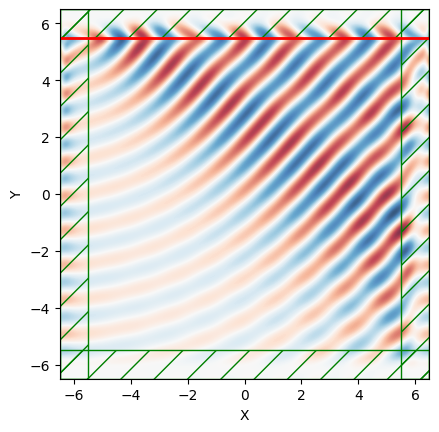

In [21]:
sim.plot2D(fields=mp.Ez)